# Probelm Statement

Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	
race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

# Step 1: Importing Required libraries

In [4]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

# for progress bar will import tqdm-notebook
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset loading and preprocessing

In [9]:
# laoding data from github repository

train_data_path = 'https://raw.githubusercontent.com/ShrikantUppin/Support-vector-machine/main/2_CSV_FILES_%26_PROBLEM_STATEMENTS/SalaryData_Train(1).csv'
validation_data_path = 'https://raw.githubusercontent.com/ShrikantUppin/Support-vector-machine/main/2_CSV_FILES_%26_PROBLEM_STATEMENTS/SalaryData_Test(1).csv'

In [10]:
train_data = pd.read_csv(train_data_path, error_bad_lines=False)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
validation_data = pd.read_csv(validation_data_path, error_bad_lines=False)
validation_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [14]:
# checking shape of train dataset
print('train_data_shape',train_data.shape)
print('validation_data_shape',validation_data.shape)

train_data_shape (30161, 14)
validation_data_shape (15060, 14)


In [15]:
print(train_data.info())
print('-'*100)
print(validation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [16]:
# checking is column names of given train & test datasets are same or different

check1 = list(train_data.columns == validation_data.columns)
print(check1)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [17]:
# checking for total unique values counts in train & test dataset.

def unique_value_counts(datafeed):
    for i in datafeed.select_dtypes(include=object).columns:
        print(i,'{}:'.format(' '*(13-len(i))),datafeed.select_dtypes(include=object)[i].nunique())

In [18]:
unique_value_counts(train_data)

workclass     : 7
education     : 16
maritalstatus : 7
occupation    : 14
relationship  : 6
race          : 5
sex           : 2
native        : 40
Salary        : 2


 ## Categorical data handling 

In [82]:
X = train_data.drop(['Salary'], axis=1)
Y = pd.DataFrame(data=train_data.Salary, columns=['Salary'])

X_val = validation_data.drop(['Salary'], axis=1)
Y_val = pd.DataFrame(data=validation_data.Salary, columns=['Salary'])

In [83]:
X['sex'] = pd.get_dummies(X.sex, drop_first=True) 
X_val['sex'] = pd.get_dummies(X_val.sex, drop_first=True)

In [84]:
Y['Salary'] = pd.get_dummies(Y, drop_first=True) 
Y_val['Salary'] = pd.get_dummies(Y_val, drop_first=True)

In [85]:
# label encoding

def label_encoding(datafeed):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in datafeed.select_dtypes(include=object).columns:
        datafeed[i]= label_encoder.fit_transform(datafeed.select_dtypes(include=object)[i]) 
        
    return datafeed.head()

In [86]:
label_encoding(X)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [87]:
label_encoding(X_val)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37


In [245]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35, stratify=Y, random_state=42)

# Step 6: Pipeline

In [246]:
# importing required libraries...

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [247]:
# creating pipe..which will perform operation on given data..

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42, n_components= 0.95)),
    ('svm', SVC(kernel = 'rbf', random_state = 42))
])

In [248]:
clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('svm', SVC(random_state=42))])

In [249]:
train_score = clf.score(x_train, y_train)
train_score.round(2)

0.85

In [250]:
test_score = clf.score(x_test, y_test)
test_score

0.8413375011840485

In [251]:
val_score = clf.score(X_val, Y_val)
val_score

0.8442231075697211

In [252]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [253]:
y_pred_test = clf.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [254]:
y_pred_val = clf.predict(X_val)
y_pred_val

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

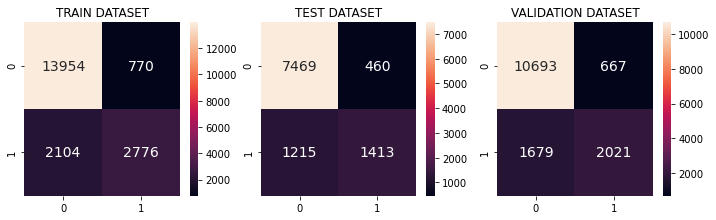

recall_score for train dataset: 0.57
recall_score for test dataset: 0.54
recall_score for validation dataset: 0.55


In [255]:

from sklearn.metrics import confusion_matrix, classification_report, recall_score

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_val = confusion_matrix(Y_val, y_pred_val)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,3))
plt.tight_layout()
ax1.title.set_text('TRAIN DATASET')
ax2.title.set_text('TEST DATASET')
ax3.title.set_text('VALIDATION DATASET')
sns.heatmap(cm_train, annot=True, ax =ax1, fmt='g', annot_kws={"fontsize":14})
sns.heatmap(cm_test, annot=True, ax =ax2, fmt='g', annot_kws={"fontsize":14})
sns.heatmap(cm_val, annot=True, ax =ax3, fmt='g', annot_kws={"fontsize":14})
plt.show()

print('recall_score for train dataset:',recall_score(y_train, y_pred_train).round(2))
print('recall_score for test dataset:',recall_score(y_test, y_pred_test).round(2))
print('recall_score for validation dataset:',recall_score(Y_val, y_pred_val).round(2)) 